In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [270]:
data=pd.read_csv('../../database/automobile.csv')
print(f'the head of the data is\n{data.head()}\n the shape of the data is:{data.shape}')


the head of the data is
    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         m

In [271]:
print(data.describe())


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [272]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    symboling         205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# For this dataset 
we are going to require more about the cars by itself, therefore, it is required to acquire the data that we don't know. But first. it'll be useful to check where are the nans.
At the moment that we know where's the data, therefore it'll be useful to check it out y subjoints of cars, would it be interesting to check by models or ome categorical
It'll be important to check each type of data. May be we are going to require to translate the values of the car to check some plots. And also it' ll be important to look out the categorical variables.
Also, it is important some histogramas of all of the type of data, at least with the categorical

In [273]:
data.replace('?', np.nan, inplace=True)
print(data)

      symboling normalized-losses         make fuel-type aspiration  \
0             3               NaN  alfa-romero       gas        std   
1             3               NaN  alfa-romero       gas        std   
2             1               NaN  alfa-romero       gas        std   
3             2               164         audi       gas        std   
4             2               164         audi       gas        std   
..          ...               ...          ...       ...        ...   
200          -1                95        volvo       gas        std   
201          -1                95        volvo       gas      turbo   
202          -1                95        volvo       gas        std   
203          -1                95        volvo    diesel      turbo   
204          -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

We've cleand some data and changed the type of the variable to our convenience. Now, let's check i fwe have duplicated

In [274]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['highway-mpg']=data['highway-mpg'].astype(float)
data['price     ']=data['price     '].astype(float)

In [8]:

conteo_filas_duplicadas = data.duplicated().sum()
print(conteo_filas_duplicadas)
#print(duplicated)


0


Let's check a correlation map


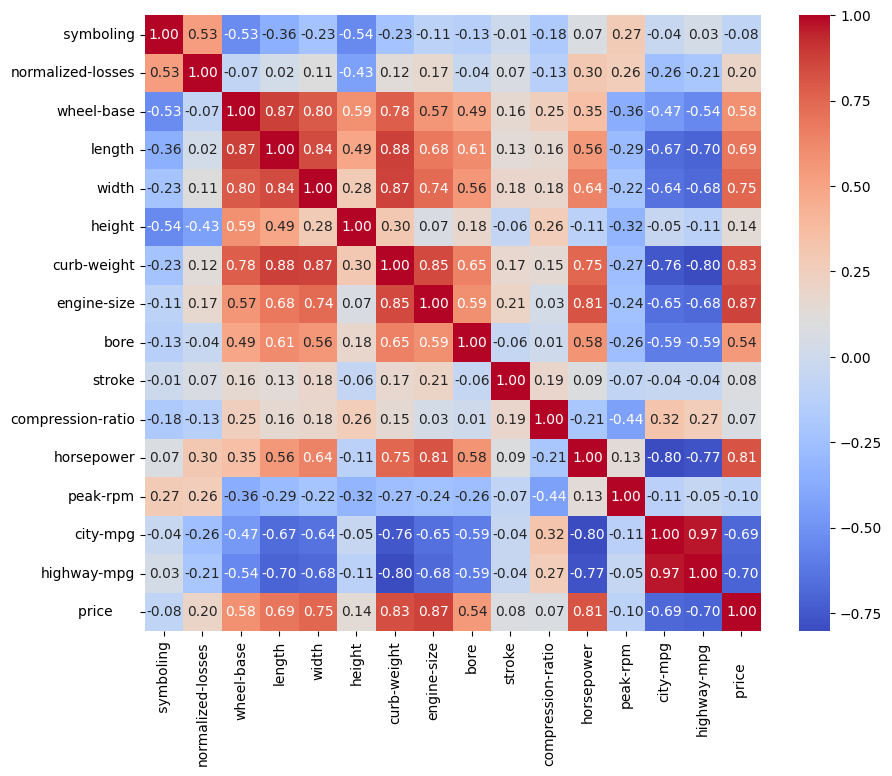

In [58]:
df_numerico = data.select_dtypes(include=[int, float]) #with just numerical data
matriz_correlacion = df_numerico.corr()
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Mostrar el gráfico
plt.show()

# Other step to check, it'll be useful to see how the plots are working on

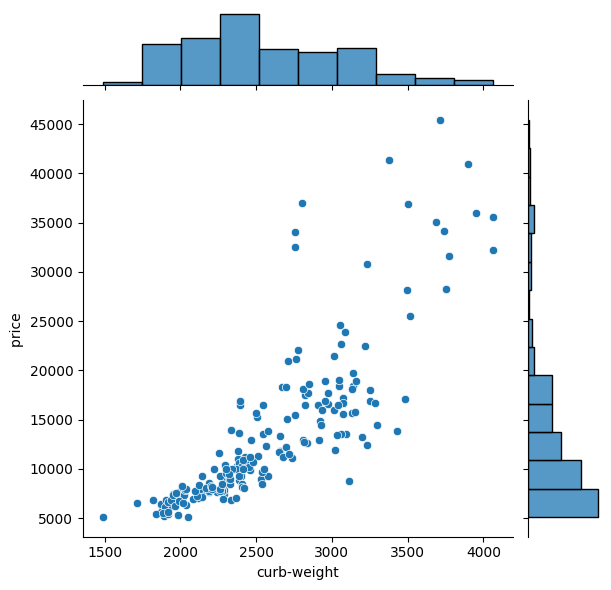

In [10]:
sns.jointplot(x='curb-weight', y='price     ', data=data)

Let's make some exploratory data withsome plots and skewness


In [11]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Treatment for symboling
Let's check the lack of data on eac column to maake able the analysis

In [12]:
data[data[' symboling'].isnull()]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


There were no lack of data in the column symboling

In [13]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26.0,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25.0,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25.0,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22.0,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25.0,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22.0,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22.0,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20.0,36880.0


skew=  0.7659764175950632
mean= 122.0
median= 115.0


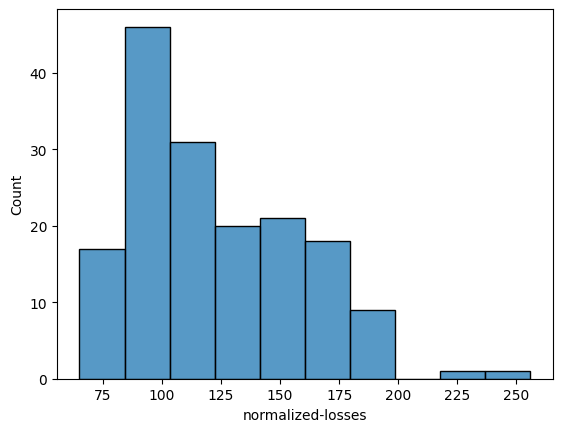

In [14]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

data['normalized-losses']=data['normalized-losses'].replace(np.nan,data['normalized-losses'].median())

skew=  0.9761135438633949
mean= 120.6
median= 115.0


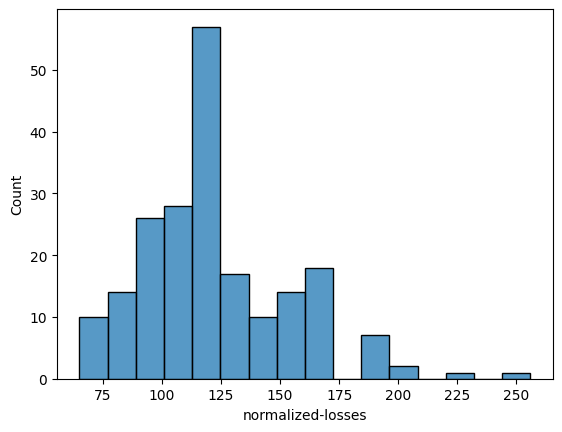

In [15]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

|parameter\value|before|median|150|
|-------|----|----|---|
|skew|0.7659764175950632| 0.9761135438633949|0.3236915397985183|
|mean|122.0|120.6|127.6|
|median|115.0|115.0|128.0|

# Let's check the next columns
However it'll be useful to check by now what happens when we use those columns that have a stronger correlation among the price, so let's check it
* highway-mpg data complete 
* city-mpg data complete yes
* horsepower 2 values missing yes
* engine-size 0 values missing yes
* curb weight 0 values missing yes 
* width  0 values missing
* length  0 values missing
* price 0 values missing 

In [275]:
data[data['price     '].isnull()]
data['price     ']=data['price     '].replace(np.nan,data['price     '].mean())
print("skew",data['price     '].skew())


skew 1.8273241596359218


In [18]:
print(data['price     '].describe())
print("skew",data['price     '].skew())


count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price     , dtype: float64
skew 1.8409793088634683


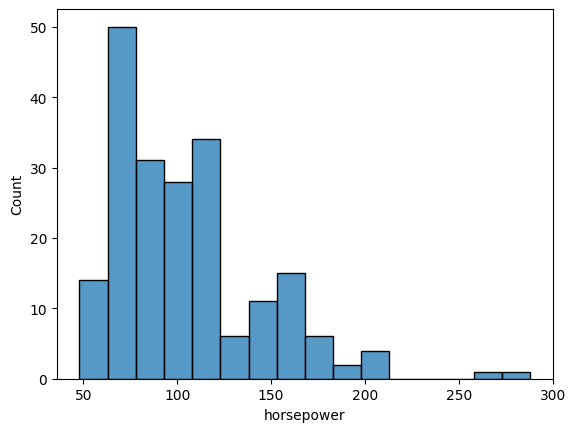

In [399]:
sns.histplot(data,x=data['horsepower'])
data['horsepower']=data['horsepower'].replace(np.nan,data['horsepower'].median())

In [400]:
data[data['horsepower'].isnull()]
data['horsepower'].describe()

count    205.000000
mean     104.165854
std       39.529733
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

# Let's try the CV 5x2 into our problem just to check, what happens if we are making the regression

# Engine size


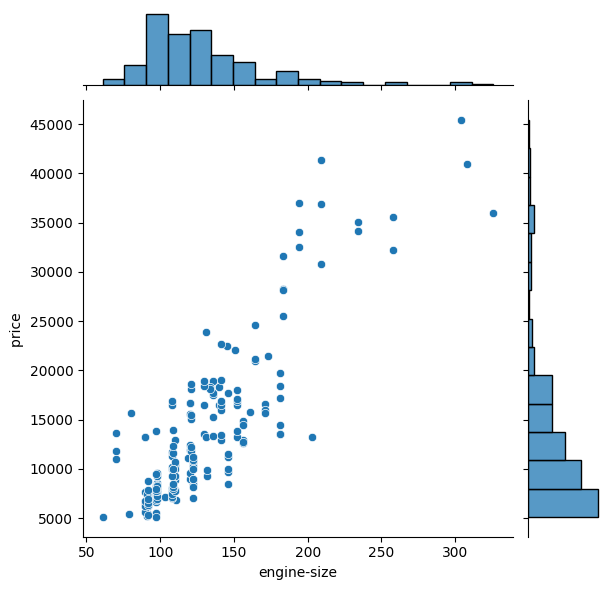

In [83]:
sns.jointplot(x=data['engine-size'], y=data['price     '])

Estadístico W: 0.8294385626444791
p-valor: 3.056836326510724e-14
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
Estadístico W: nan
p-valor: nan
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
                price  engine-size
price        1.000000     0.861752
engine-size  0.861752     1.000000


<Axes: >

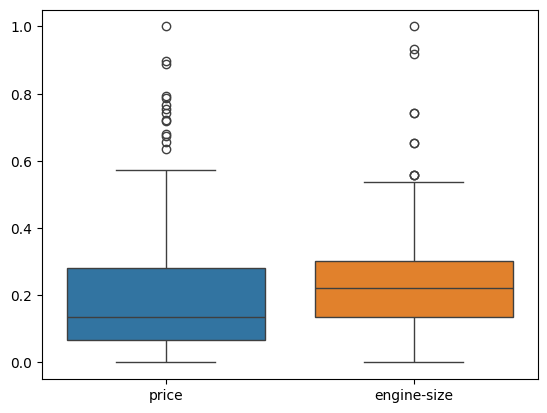

In [154]:
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
stat,p_value=stats.shapiro(data['engine-size'])
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

stat,p_value=stats.shapiro(data)
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")
dfT1=pd.DataFrame({
    'price':data['price     '],
    'engine-size':data['engine-size']
})
scaler = MinMaxScaler()
dfT1[['price', 'engine-size']] = scaler.fit_transform(dfT1[['price', 'engine-size']])
print(dfT1.corr())


sns.boxplot(dfT1)


                price  engine-size
price        1.000000     0.692245
engine-size  0.692245     1.000000


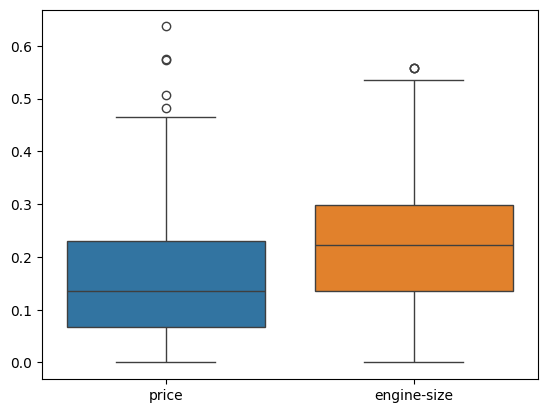

In [155]:
Q1p = dfT1['price'].quantile(0.10)
Q3p = dfT1['price'].quantile(0.75)
IQRp = Q3p - Q1p
Q1e = dfT1['engine-size'].quantile(0.10)
Q3e = dfT1['engine-size'].quantile(0.75)
IQRe = Q3e - Q1e
mean_price = dfT1['price'].mean()
dfT1['price'] = np.where(
    (dfT1['price'] < (Q1p - 1.5 * IQRp)) | (dfT1['price'] > (Q3p + 1.5 * IQRp)),
    mean_price,
    dfT1['price']
)

# Reemplazar outliers en 'engine-size' con la media
mean_engine_size = dfT1['engine-size'].mean()
dfT1['engine-size'] = np.where(
    (dfT1['engine-size'] < (Q1e - 1.5 * IQRe)) | (dfT1['engine-size'] > (Q3e + 1.5 * IQRe)),
    mean_engine_size,
    dfT1['engine-size'])
sns.boxplot(dfT1)

print(dfT1.corr())


# Normalize
Due to are differente magintuds, let's normalize them


Mean R^2: 0.7362087367142167
MSE:  16108000.544222165
Slope: [[158.4106251]]
Intercept: [-7137.29125762]


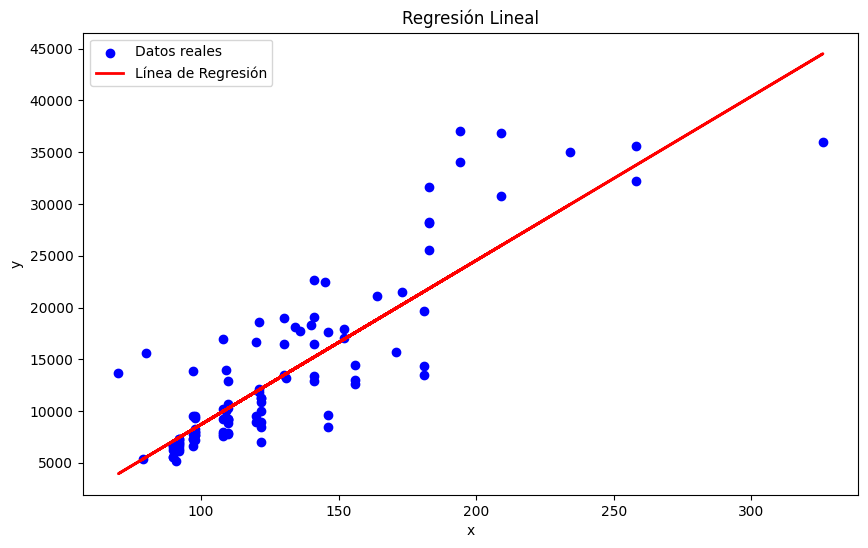

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
model = LinearRegression() 
mse_scores = []
r2_scores = []
X=(dfT1['engine-size']).to_frame()
Y=(dfT1['price']).to_frame()

X=(data['engine-size']).to_frame()
Y=(data['price     ']).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

                price  engine-size
price        1.000000     0.861752
engine-size  0.861752     1.000000


<Axes: >

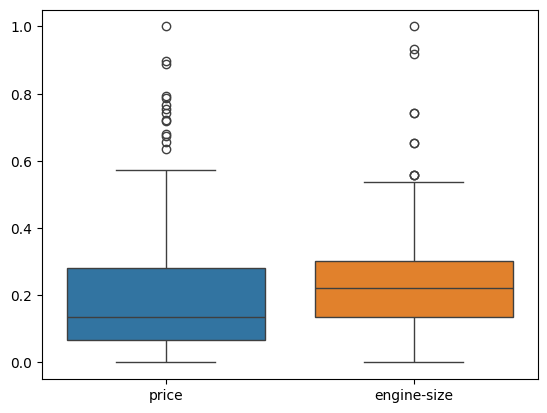

In [349]:
dfT1=pd.DataFrame({
    'price':data['price     '],
    'engine-size':data['engine-size']
})
#dfT1['price']=np.log(dfT1['price']+1)
#dfT1['engine-size']=np.log(dfT1['engine-size']+1)
scaler=MinMaxScaler()
dfT1[['price', 'engine-size']] = scaler.fit_transform(dfT1[['price', 'engine-size']])
print(dfT1.corr())

sns.boxplot(dfT1)


Mean R^2: 0.7362087367142168
MSE:  0.00992703573774292
RMSE:  0.00992703573774292
Slope: [[1.04212342]]
Intercept: [-0.06435239]


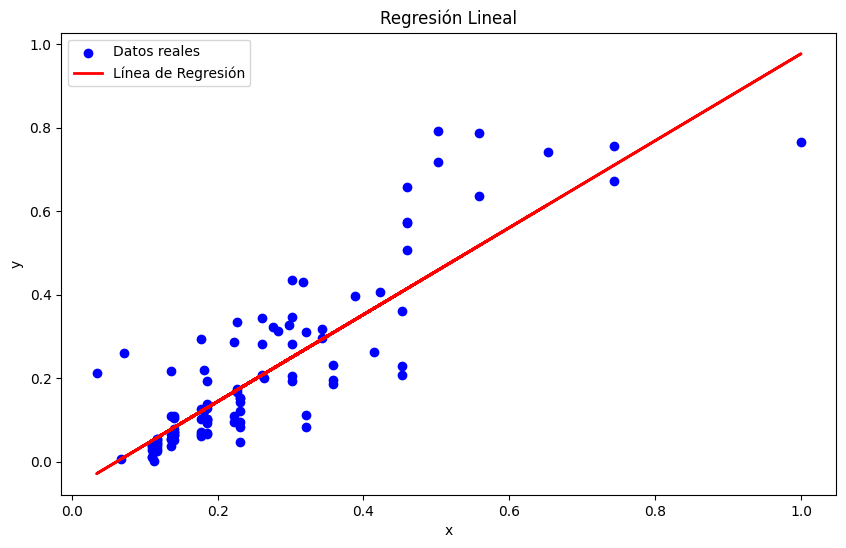

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
model = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=(dfT1['engine-size']).to_frame()
Y=(dfT1['price']).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# MPG


Correlation           city-mpg     price
city-mpg  1.000000 -0.667449
price    -0.667449  1.000000
Skew city-mpg    0.663704
price       1.827324
dtype: float64


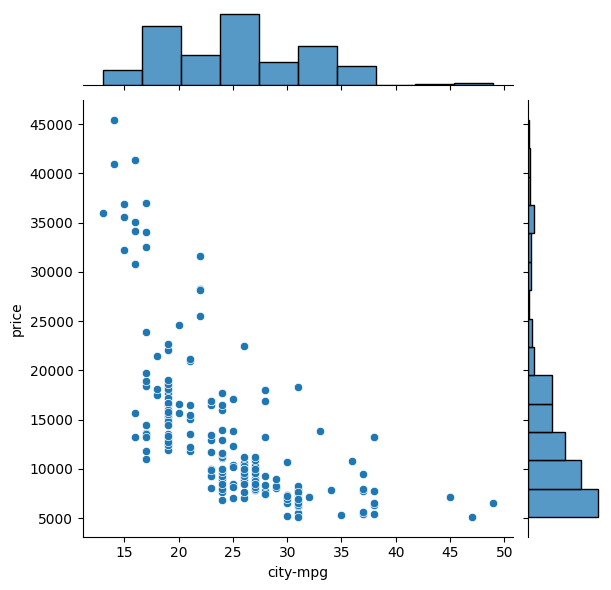

In [324]:
dfT2=pd.DataFrame({
    'city-mpg':data['city-mpg'],
    'price':data['price     ']
})
print("Correlation",dfT2.corr())
print("Skew",dfT2.skew())

sns.jointplot(x=dfT2['city-mpg'],y=dfT2.price)

Correlation
           city-mpg     price
city-mpg  1.000000 -0.791234
price    -0.791234  1.000000
Skew city-mpg    0.026578
price       0.667808
dtype: float64


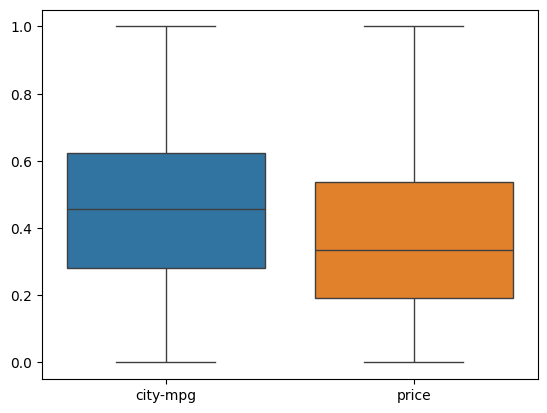

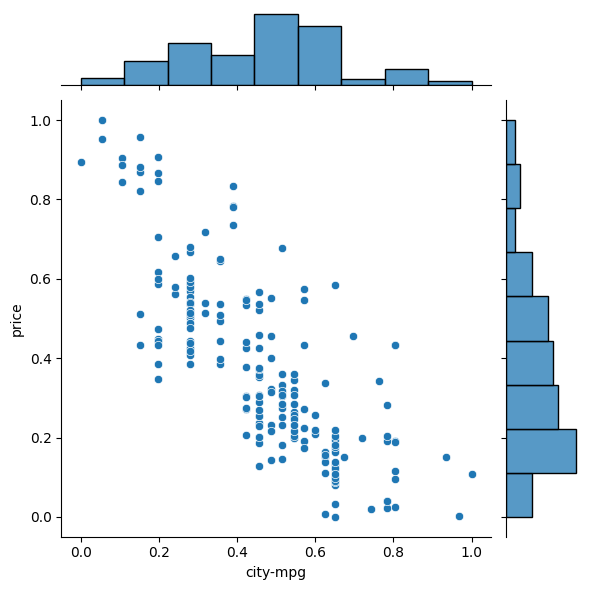

In [329]:
dfT2['city-mpg']=np.log(dfT2['city-mpg']+1)
dfT2['price']=np.log(dfT2['price']+1)

scaler=MinMaxScaler()
dfT2[['city-mpg','price']] = scaler.fit_transform(dfT2[['city-mpg','price']])
print("Correlation\n",dfT2.corr())
print("Skew",dfT2.skew())
sns.boxplot(dfT2)
sns.jointplot(x=dfT2['city-mpg'],y=dfT2.price)

Mean R^2: 0.6045640689950125
MSE:  0.020279279592056144
RMSE:  0.020279279592056144
Slope: [[-0.84773538]]
Intercept: [0.7644927]


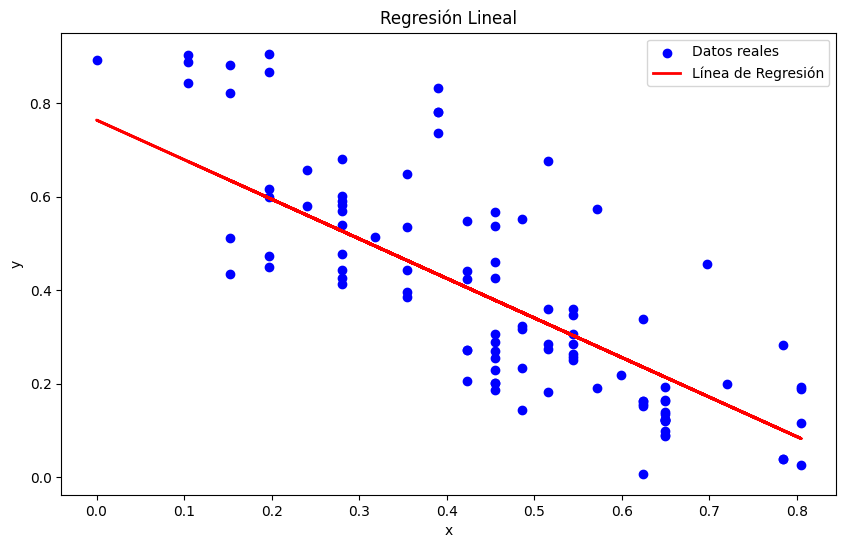

In [330]:
model1 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=dfT2['city-mpg'].to_frame()
Y=dfT2['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.39165384316704965
MSE:  36940846.7156622
RMSE:  36940846.7156622
Slope: [[-678.15345373]]
Intercept: [30037.71215967]


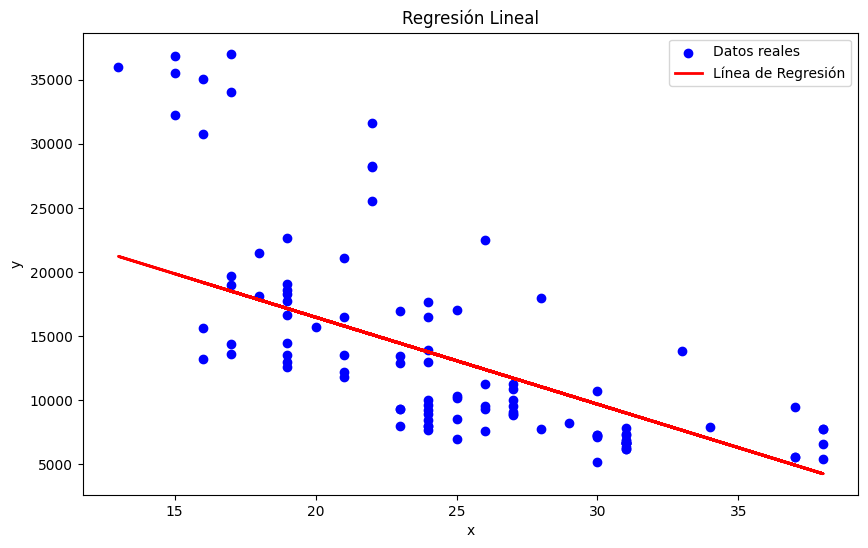

In [327]:
model1 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=dfT2['city-mpg'].to_frame()
Y=dfT2['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Crub weight

Correlation              curb-weight     price
curb-weight     1.000000  0.820825
price           0.820825  1.000000
Skew curb-weight    0.681398
price          1.827324
dtype: float64


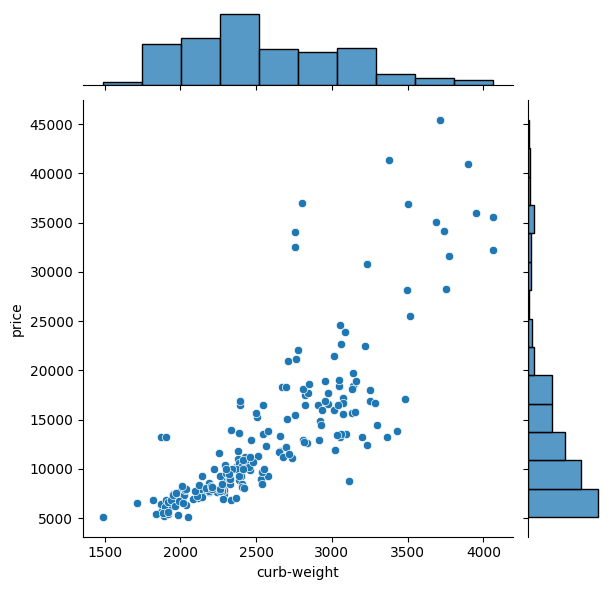

In [385]:
dfT3=pd.DataFrame({
    'curb-weight':data['curb-weight'],
    'price':data['price     ']
})
print("Correlation",dfT3.corr())
print("Skew",dfT3.skew())

sns.jointplot(x=dfT3['curb-weight'],y=dfT3.price)


Correlation
              curb-weight     price
curb-weight     1.000000  0.876229
price           0.876229  1.000000
Skew curb-weight    0.681398
price          0.667808
dtype: float64


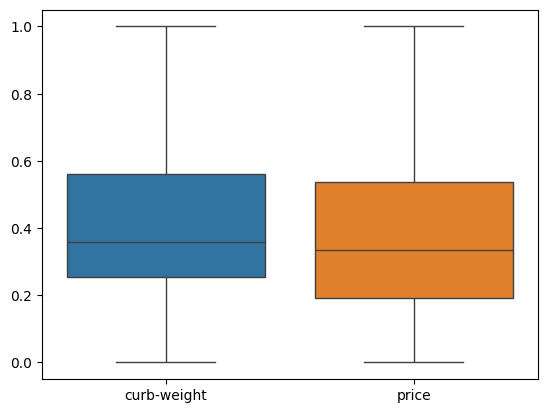

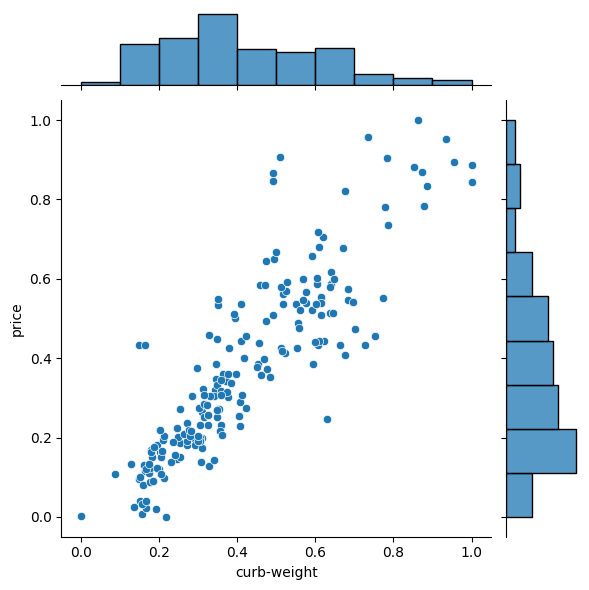

In [386]:

dfT3['price']=np.log(dfT3['price']+1)

scaler=MinMaxScaler()
dfT3[['curb-weight','price']] = scaler.fit_transform(dfT3[['curb-weight','price']])
print("Correlation\n",dfT3.corr())
print("Skew",dfT3.skew())
sns.boxplot(dfT3)
sns.jointplot(x=dfT3['curb-weight'],y=dfT3.price)

Mean R^2: 0.7595183149109518
MSE:  0.012140499045124736
Slope: [[0.95482217]]
Intercept: [-0.02616991]


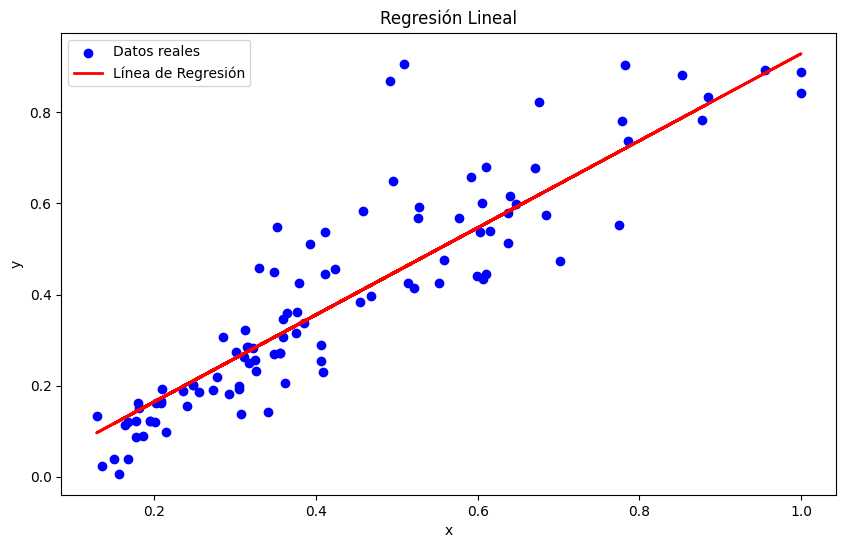

In [381]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=dfT3['curb-weight'].to_frame()
Y=dfT3['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.7476173491077281
MSE:  0.06046404724209488
Slope: [[2.04396388]]
Intercept: [-6.65330953]


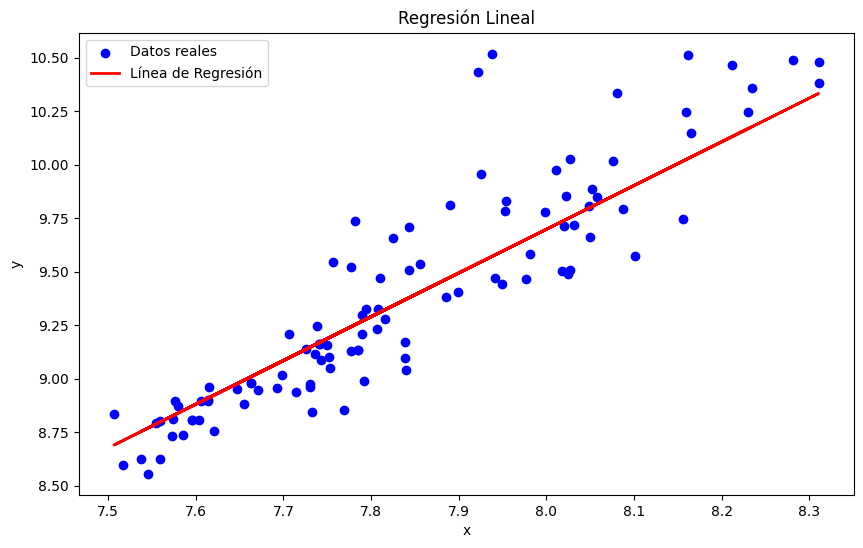

In [390]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=np.log(data['curb-weight']+1).to_frame()
Y=np.log(data['price     ']+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Horse power

Correlation             HorsePower     price
HorsePower    1.000000  0.758769
price         0.758769  1.000000
Skew HorsePower    1.403441
price         1.827324
dtype: float64


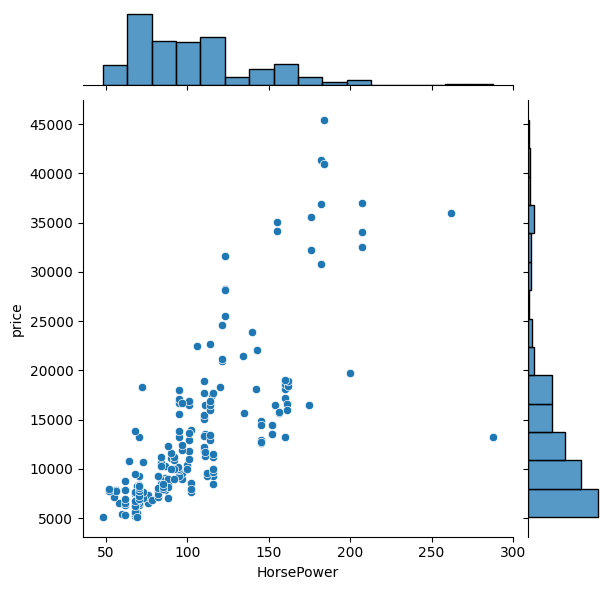

In [401]:
dfT4=pd.DataFrame({
    'HorsePower':data['horsepower'],
    'price':data['price     ']
})
print("Correlation",dfT4.corr())
print("Skew",dfT4.skew())

sns.jointplot(x=dfT4['HorsePower'],y=dfT4.price)


Correlation
             HorsePower     price
HorsePower    1.000000  0.814306
price         0.814306  1.000000
Skew HorsePower    0.485820
price         0.667808
dtype: float64


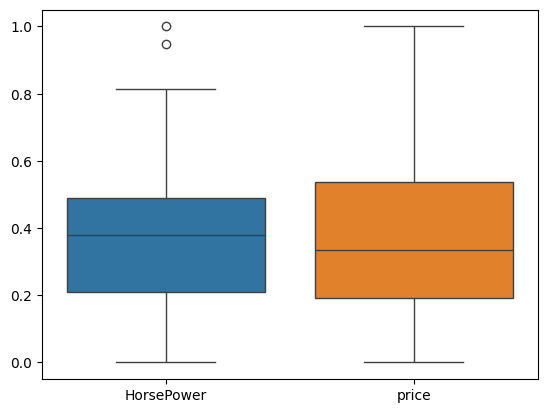

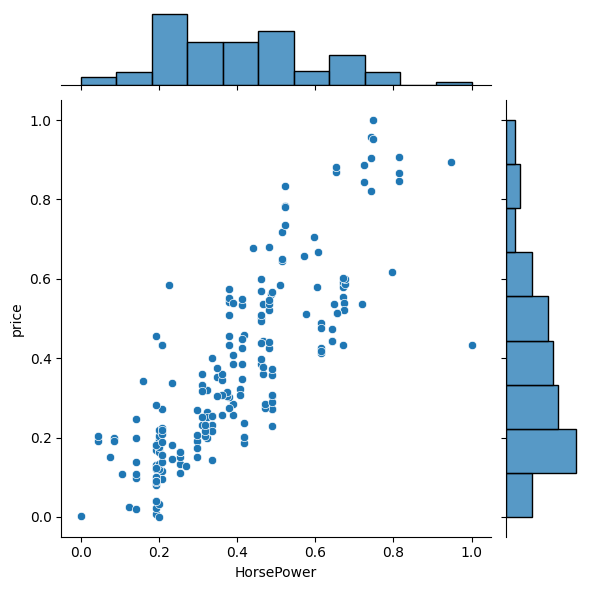

In [402]:
dfT4['price']=np.log(dfT4['price']+1)

dfT4['HorsePower']=np.log(dfT4['HorsePower']+1)
scaler=MinMaxScaler()
dfT4[['HorsePower','price']] = scaler.fit_transform(dfT4[['HorsePower','price']])
print("Correlation\n",dfT4.corr())
print("Skew",dfT4.skew())
sns.boxplot(dfT4)
sns.jointplot(x=dfT4['HorsePower'],y=dfT4.price)

Mean R^2: 0.643410145660548
MSE:  0.018231972174382653
Slope: [[0.88501306]]
Intercept: [0.02235048]


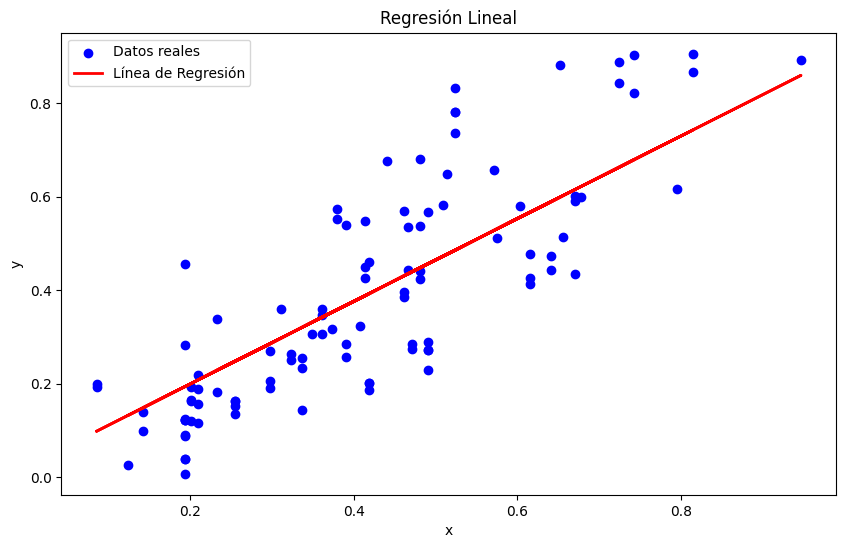

In [403]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=dfT4['HorsePower'].to_frame()
Y=dfT4['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

             make    price     
7          jaguar  34600.000000
9   mercedes-benz  33647.000000
15        porsche  27761.825871
2             bmw  26118.750000
21          volvo  18063.181818
1            audi  17194.589908
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
6           isuzu  11061.814677
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2892\398361553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='price     ', data=grouped_by_brand, palette='viridis')


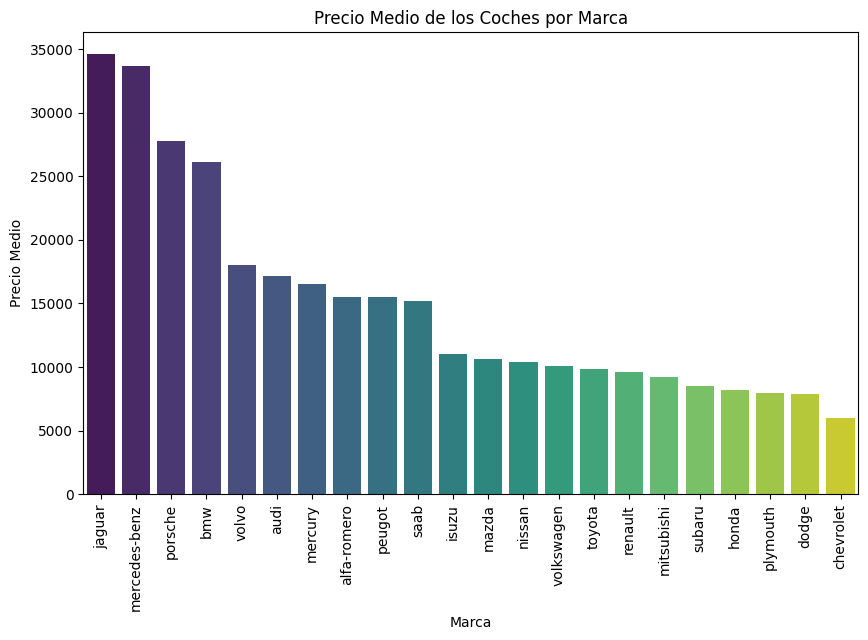

In [427]:
brand_count=data['make'].unique()
grouped_by_brand=data.groupby('make')['price     '].mean().reset_index()
grouped_by_brand=grouped_by_brand.sort_values(by='price     ',ascending=False)
print(grouped_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='price     ', data=grouped_by_brand, palette='viridis')
plt.xlabel('Marca')
plt.ylabel('Precio Medio')
plt.title('Precio Medio de los Coches por Marca')
plt.xticks(rotation=90)  # Rotar los nombres de las marcas si son muchos
plt.show()


             make    price     
7          jaguar  34600.000000
9   mercedes-benz  33647.000000
15        porsche  27761.825871
2             bmw  26118.750000
21          volvo  18063.181818
1            audi  17194.589908
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
6           isuzu  11061.814677
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2892\3642560451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='engine-size', data=grouped_by_brand2, palette='viridis')


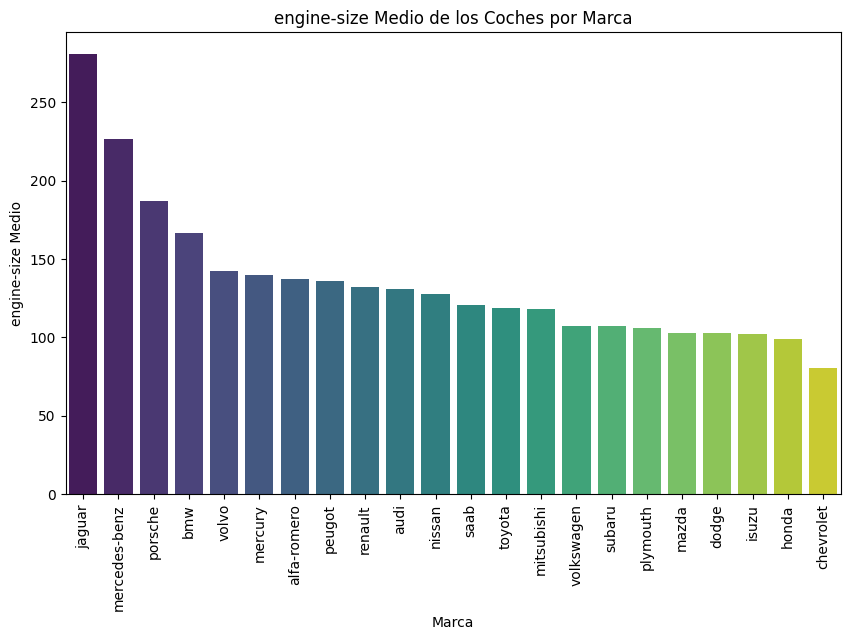

In [428]:
dfT5=pd.DataFrame({
    'engine-size':data['engine-size'],
    'make':data['make']
})
brand_count2=dfT5['make'].unique()
grouped_by_brand2=dfT5.groupby('make')['engine-size'].mean().reset_index()
grouped_by_brand2=grouped_by_brand2.sort_values(by='engine-size',ascending=False)
print(grouped_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='engine-size', data=grouped_by_brand2, palette='viridis')
plt.xlabel('Marca')
plt.ylabel('engine-size Medio')
plt.title('engine-size Medio de los Coches por Marca')
plt.xticks(rotation=90)  # Rotar los nombres de las marcas si son muchos
plt.show()
